In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
dataframe=pd.read_csv("/content/drive/MyDrive/regression problem/train (1).csv")
dataframe.head()

col_id = dataframe['id']

In [4]:
dataframe.shape

(1293, 26)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1293 non-null   int64  
 1   Name                                  1293 non-null   object 
 2   Aerial Duels won                      1293 non-null   float64
 3   Age                                   1293 non-null   int64  
 4   Assists                               1293 non-null   float64
 5   Attacking options created             1293 non-null   float64
 6   Attempted Passes                      1293 non-null   float64
 7   Blocks                                1293 non-null   float64
 8   Clearances                            1293 non-null   float64
 9   Country                               1220 non-null   object 
 10  Expected Goal Contributions           1293 non-null   float64
 11  Interceptions    

In [6]:
dataframe.describe()

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1219.000000,1263.000000,1288.000000,1293.000000
mean,856.735499,1.382135,26.754060,0.094161,2.325615,44.216087,1.114493,1.720789,0.107193,0.902011,...,3.659482,1.778708,1.300425,0.912746,2.233998,1.661075,12.473790,12.593151,12.476863,13.702049
std,492.917532,1.135876,4.248273,0.103059,1.287562,15.424559,0.439152,1.398585,0.086729,0.547380,...,1.726467,1.259224,0.942240,0.796205,1.762880,0.761340,18.008448,16.995535,16.618381,18.838001
min,0.000000,0.000000,17.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.180000,0.000000,0.000000,0.000000,0.000000,0.090000,0.025000,0.050000,0.025000,0.000000
25%,429.000000,0.600000,24.000000,0.000000,1.300000,33.200000,0.800000,0.630000,0.040000,0.500000,...,2.400000,0.790000,0.530000,0.330000,0.830000,1.090000,1.800000,2.200000,2.500000,3.000000
50%,871.000000,1.100000,26.000000,0.070000,2.170000,44.300000,1.100000,1.260000,0.090000,0.900000,...,3.440000,1.530000,1.020000,0.710000,1.630000,1.620000,5.500000,6.000000,6.000000,7.000000
75%,1283.000000,1.900000,30.000000,0.150000,3.220000,54.300000,1.380000,2.510000,0.150000,1.300000,...,4.620000,2.520000,1.950000,1.280000,3.380000,2.170000,16.000000,16.000000,16.000000,18.000000
max,1701.000000,13.000000,42.000000,0.630000,7.020000,104.300000,3.300000,7.830000,0.540000,3.100000,...,12.220000,7.900000,4.580000,6.590000,9.650000,4.390000,180.000000,160.000000,160.000000,180.000000


In [7]:
dataframe.duplicated().sum()

0

In [8]:
column=dataframe.columns.to_list()
column

['id',
 'Name',
 'Aerial Duels won',
 'Age',
 'Assists',
 'Attacking options created',
 'Attempted Passes',
 'Blocks',
 'Clearances',
 'Country',
 'Expected Goal Contributions',
 'Interceptions',
 'Open Play Goals',
 'Open Play Expected Goals',
 'Percentage of Passes Completed',
 'Progressive Passes Rec',
 'Progressive Passes',
 'Progressive Carries',
 'Shots',
 'Successful Dribbles',
 'Touches in attacking penalty area',
 'Tackles',
 'Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season',
 'Value at beginning of 2023/24 season']

In [9]:
len(column)

26

In [10]:
dataframe.isnull().sum()

id                                       0
Name                                     0
Aerial Duels won                         0
Age                                      0
Assists                                  0
Attacking options created                0
Attempted Passes                         0
Blocks                                   0
Clearances                               0
Country                                 73
Expected Goal Contributions              0
Interceptions                            0
Open Play Goals                          0
Open Play Expected Goals                 0
Percentage of Passes Completed           0
Progressive Passes Rec                   0
Progressive Passes                       0
Progressive Carries                      0
Shots                                    0
Successful Dribbles                      0
Touches in attacking penalty area        0
Tackles                                  0
Value at beginning of 2020/21 season    74
Value at be

In [11]:
dataframe.fillna(12.51)

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.80,1.3,1.20
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,12.51,1.0,2.50
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.50,1.8,6.00
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.00,9.0,8.00
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,12.51,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.50,9.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1130,Mergim Vojvoda,0.5,28,0.26,3.41,59.8,0.73,1.62,Kosovo,...,6.54,1.57,1.20,0.63,2.04,1.15,5.0,4.50,5.5,4.00
1289,1294,Pablo Sarabia,0.3,31,0.00,4.01,42.4,0.81,0.29,Spain,...,4.33,1.98,2.13,0.29,2.94,1.32,25.0,25.00,25.0,14.00
1290,860,Kevin Agudelo,0.7,24,0.04,2.61,31.0,1.65,0.25,Colombia,...,4.65,3.42,1.18,2.11,2.28,3.00,3.5,3.30,3.5,3.00
1291,1459,Salis Abdul Samed,0.4,23,0.03,1.63,61.6,1.18,0.81,Ghana,...,5.13,1.03,0.40,0.90,0.50,1.43,0.3,2.00,2.5,18.00


In [12]:
dataframe.head()

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.2
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,NaN,1.0,2.5
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.0
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.0
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,NaN,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.0


In [13]:
dataframe=dataframe.fillna(12.51)

In [14]:
dataframe.head()

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.80,1.3,1.2
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,12.51,1.0,2.5
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.50,1.8,6.0
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.00,9.0,8.0
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,12.51,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.50,9.0,60.0


In [15]:
df=dataframe

In [16]:
df=df.drop('id', axis=1)
df=df.drop('Name', axis=1)
df=df.drop('Country', axis=1)

In [17]:
y=df['Value at beginning of 2023/24 season']

In [18]:
X=df.drop('Value at beginning of 2023/24 season',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
num_features = len(X_train[1,:])

In [22]:
X.head()

,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,Open Play Goals,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,1.3,23,0.11,3.68,31.8,0.69,0.97,0.16,1.1,0.06,...,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.80,1.3
1,0.2,21,0.17,3.49,29.5,0.52,0.00,0.25,0.2,0.00,...,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,12.51,1.0
2,0.0,24,0.28,2.99,27.5,0.76,0.36,0.26,0.2,0.12,...,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.50,1.8
3,2.1,25,0.24,2.44,23.5,0.76,0.81,0.14,0.3,0.33,...,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.00,9.0
4,2.9,26,0.05,1.19,80.4,1.06,3.64,0.04,1.5,0.05,...,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.50,9.0


In [23]:
y.head()

0     1.2
1     2.5
2     6.0
3     8.0
4    60.0
Name: Value at beginning of 2023/24 season, dtype: float64

In [24]:
# ANN with Keras
np.random.seed(10)
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(22, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features))
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error')        # metrics=['mse','mae']
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)  # ignored
history_mse = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], verbose = 0, validation_split = 0.2)

print('Loss:    ', history_mse.history['loss'][-1], '\nVal_loss: ', history_mse.history['val_loss'][-1])

Loss:     52.95675277709961 
Val_loss:  134.2911834716797


In [25]:
# EVALUATE MODEL IN THE TEST SET
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

# EVALUATE MODEL IN THE TRAIN SET
score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

9/9 [==============================] - 0s 2ms/step - loss: 192.7651
Test Score: 192.76507568359375
33/33 [==============================] - 0s 2ms/step - loss: 59.0805
Train Score: 59.08049392700195


In [26]:
linha1 = X.iloc[0].values.reshape(1,-1)
# Scaling the first line to the same pattern used in the model
linha1 = sc_X.transform(linha1)
# Predicted value by model
y_pred_mse_1 = classifier.predict(linha1)
print('Predicted value: ',y_pred_mse_1)
print('Real value: ','1.2')

1/1 [==============================] - 0s 81ms/step
Predicted value:  [[0.11056614]]
Real value:  1.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [28]:
# ANN with Keras
np.random.seed(10)
classifier = Sequential()
     # better values with tanh agains relu, sigmoid...
classifier.add(Dense(22, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features))
classifier.add(Dense(11, kernel_initializer = 'uniform'))
classifier.add(Dense(7, kernel_initializer = 'uniform'))
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = root_mean_squared_error)        # metrics=['mse','mae']
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)  # ignored
history = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], verbose = 0, validation_split = 0.2)

print('Loss:    ', history.history['loss'][-1], '\nVal_loss: ', history.history['val_loss'][-1])

Loss:     5.416622161865234 
Val_loss:  5.910625457763672


In [29]:
# EVALUATE MODEL IN THE TEST SET
score_rmse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_rmse_test)

# EVALUATE MODEL IN THE TRAIN SET
score_rmse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_rmse_train)

9/9 [==============================] - 0s 3ms/step - loss: 6.2940
Test Score: 6.293953895568848
33/33 [==============================] - 0s 3ms/step - loss: 5.6594
Train Score: 5.659361839294434


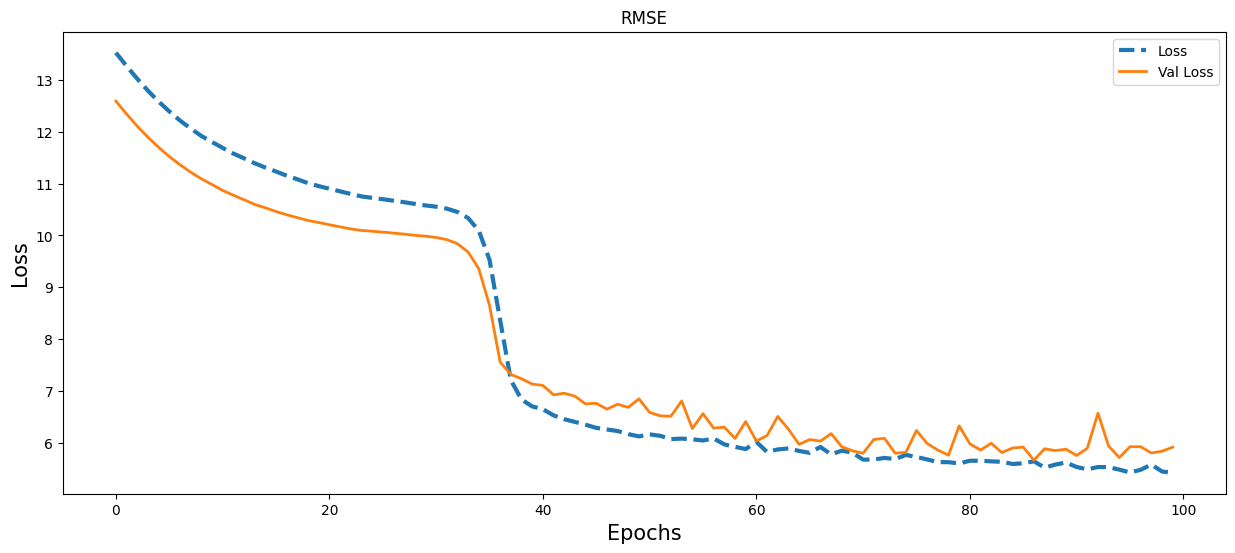

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('RMSE')
plt.legend()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
